### Import dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Data import
df = pd.read_csv('../datasets/telco-customer-churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Look for types inside the dataset

In [2]:
print(df.dtypes)
print(df.dtypes.value_counts())

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
object     18
int64       2
float64     1
Name: count, dtype: int64


Check for null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Check for missing values

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Cleaning dataset
- Remove id
- Convert Churn values to binary
- Convert TotalCharges to numeric
- Convert data to dummies

In [6]:
# Remove customers' IDs because it's going to interfere with get_dummies
df_no_ids = df.iloc[:,1:]

# Convert Churn data to binary
df_no_ids['Churn'] = df_no_ids['Churn'].map({'Yes': 1, 'No': 0}).astype(int)

df_no_ids.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [7]:
X = df_no_ids
cat_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns
print(X[cat_cols].nunique().sort_values(ascending=False).head(10))


TotalCharges        6531
PaymentMethod          4
OnlineBackup           3
OnlineSecurity         3
TechSupport            3
DeviceProtection       3
InternetService        3
MultipleLines          3
StreamingMovies        3
StreamingTV            3
dtype: int64


In [8]:
# Convert TotalCharges to numeric
df_no_ids.TotalCharges = pd.to_numeric(df_no_ids.TotalCharges, errors='coerce')
df_no_ids.isnull().sum()

X = df_no_ids
cat_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

X_dummies = pd.get_dummies(
    X,
    columns=cat_cols,
    drop_first=True,
    dummy_na=False
)

# X_dummies is now fully numeric and ready for modeling
print(X_dummies.shape)
print(X_dummies.head())


(7043, 31)
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0       1           29.85         29.85      0        False   
1              0      34           56.95       1889.50      0         True   
2              0       2           53.85        108.15      1         True   
3              0      45           42.30       1840.75      0         True   
4              0       2           70.70        151.65      1        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                            True  ...                            False   
1                           False  ...                   

### Find correlations between churn and other values

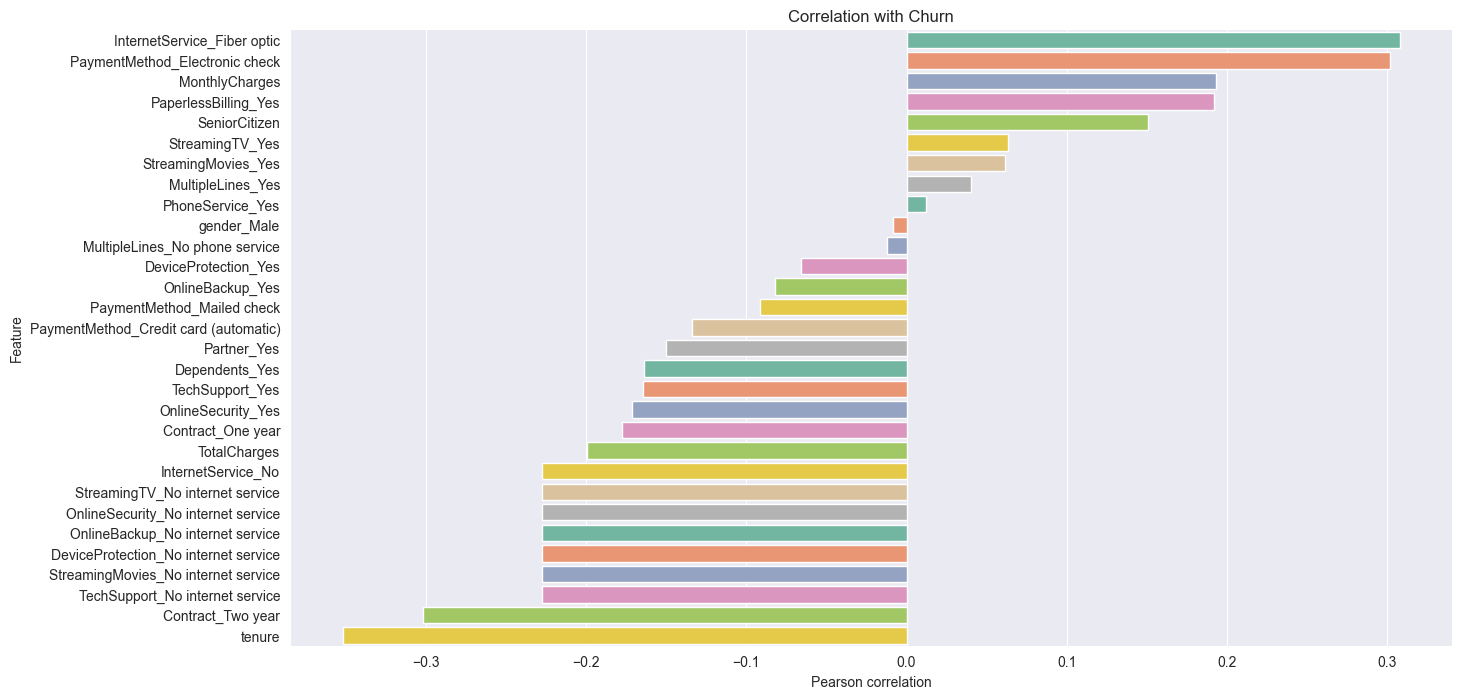

In [9]:
# Get Correlation of "Churn" with other variables:
corr = X_dummies.corr()['Churn'].drop('Churn', errors='ignore').sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x=corr.values, y=corr.index, orient='h', palette='Set2', hue=corr.index)
ax.set_title('Correlation with Churn')
ax.set_xlabel('Pearson correlation')
ax.set_ylabel('Feature')
sns.despine()


### Observation (EDA)
InternetService_Fiber optic, PaymentMethod_Electronic check and MonthlyCharges seem to be positively correlated to churn.

On the contrary, Tenure, Contract_Two year and InternetService_No seem to be negatively correlated.

We will explore these values to find other clues

We will first find the demographic of our customers.

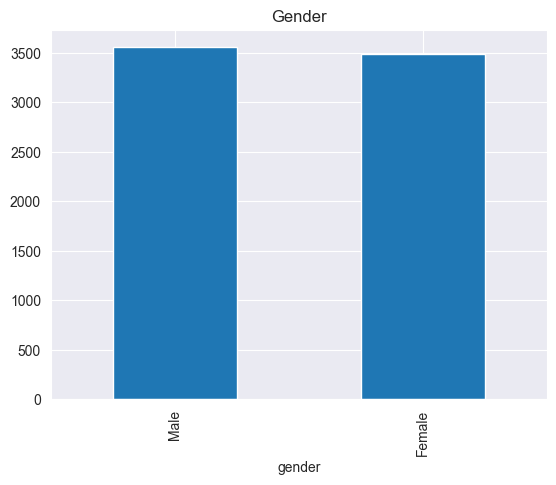

In [10]:
ax = df['gender'].value_counts().plot(kind='bar', title='Gender')

1. Gender Distribution - About half of the customers are male and the other half female

Text(0, 0.5, 'Percentage')

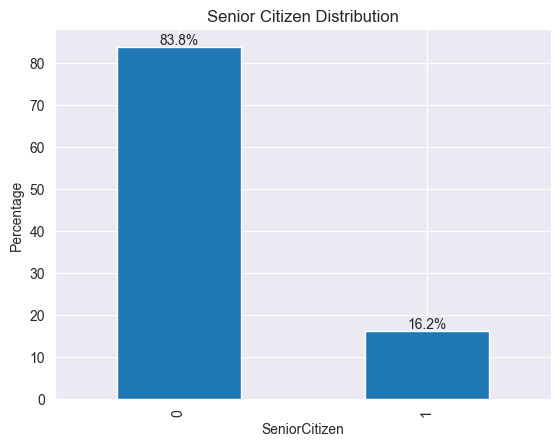

In [11]:
# Calculate percentages
total = len(df['SeniorCitizen'])
percentages = (df['SeniorCitizen'].value_counts() / total) * 100

# Create a bar plot with percentages
ax = percentages.plot(kind='bar', title='Senior Citizen Distribution')

# Add percentage labels on top of each bar
for i, v in enumerate(percentages):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.ylabel('Percentage')


2. Senior Citizen Percentage - About 16.2% of our customers are Senior Citizen, and about 83.8% are not.

Text(0, 0.5, 'Percentage')

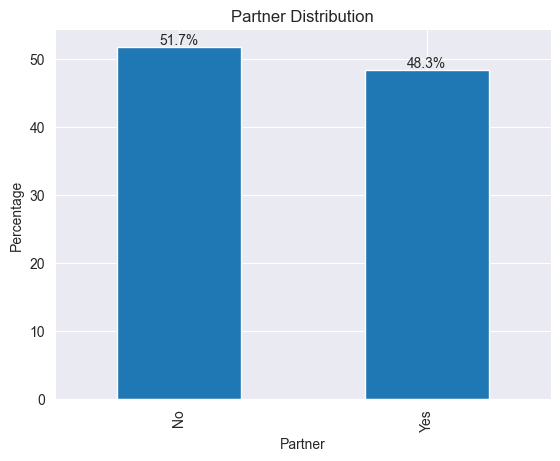

In [12]:
# Calculate percentages
total = len(df['Partner'])
percentages = (df['Partner'].value_counts() / total) * 100

# Create a bar plot with percentages
ax = percentages.plot(kind='bar', title='Partner Distribution')

# Add percentage labels on top of each bar
for i, v in enumerate(percentages):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.ylabel('Percentage')

3. Do they have a partner, or are they dependent - About partner distribution it's about 50/50 as for dependents it seems 70/30

Text(0, 0.5, 'Percentage')

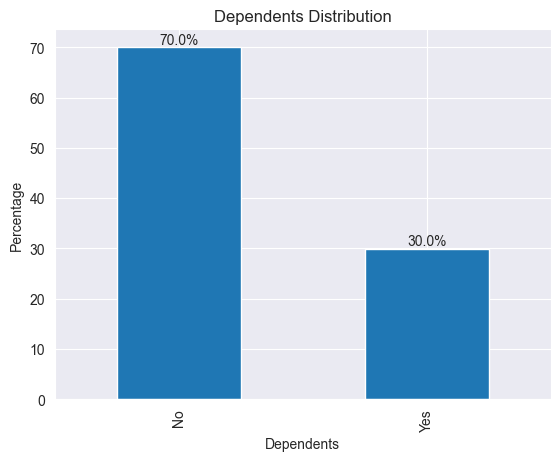

In [13]:
# Calculate percentages
total = len(df['Dependents'])
percentages = (df['Dependents'].value_counts() / total) * 100

# Create a bar plot with percentages
ax = percentages.plot(kind='bar', title='Dependents Distribution')

# Add percentage labels on top of each bar
for i, v in enumerate(percentages):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.ylabel('Percentage')

We will now look at customers' length of contracts and tenure

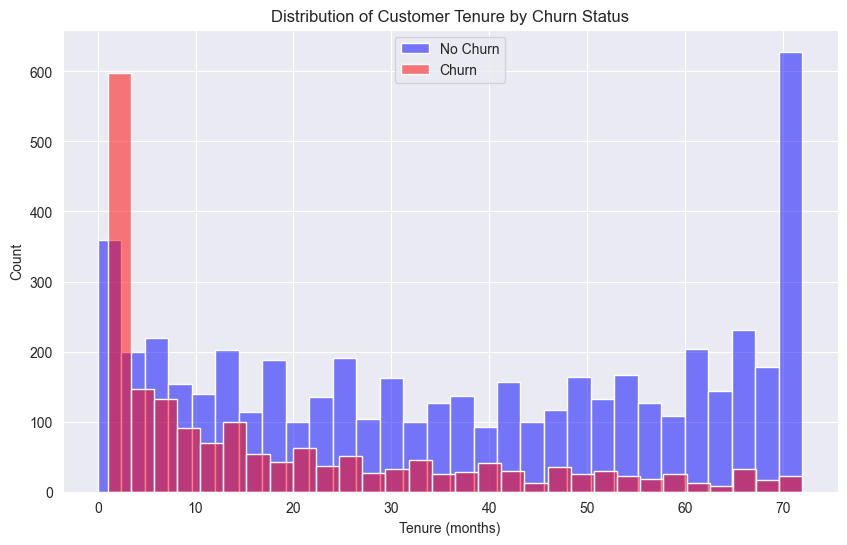

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_no_ids[df_no_ids['Churn'] == 0], x='tenure', bins=30,
             color='blue', label='No Churn', alpha=0.5)
sns.histplot(data=df_no_ids[df_no_ids['Churn'] == 1], x='tenure', bins=30,
             color='red', label='Churn', alpha=0.5)
plt.title('Distribution of Customer Tenure by Churn Status')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.legend()
plt.show()


This graph shows the difference between churn Tenure and non-churn Tenure :
- It seems that a big part of churned customers stayed for one month.

We will now look at month, year and 2-year contracts

<Figure size 1000x600 with 0 Axes>

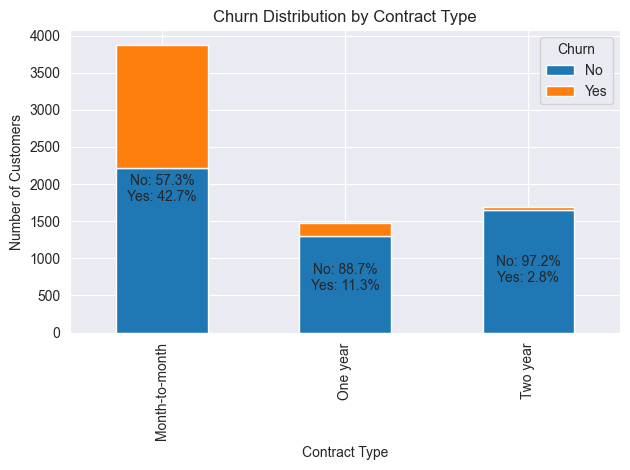

In [15]:
plt.figure(figsize=(10, 6))
churn_by_contract = df.groupby(['Contract', 'Churn']).size().unstack()
total = churn_by_contract.sum(axis=1)
percentages = (churn_by_contract.div(total, axis=0) * 100).round(1)

churn_by_contract.plot(kind='bar', stacked=True)
plt.title('Churn Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])

for i in range(len(churn_by_contract.index)):
    no_churn = percentages.iloc[i, 0]
    churn = percentages.iloc[i, 1]
    plt.text(i, churn_by_contract.iloc[i].sum() / 2,
             f'No: {no_churn}%\nYes: {churn}%',
             ha='center', va='center')

plt.tight_layout()
plt.show()


This graph shows the distribution of churned vs. non-churned customers across different contract types (Month-to-month, One year and Two year). We can observe that:

1. Month-to-month contracts have the highest churn rate
2. One-year and two-year contracts have significantly lower churn rates
3. Two-year contracts show the lowest churn rate overall


<Figure size 1000x600 with 0 Axes>

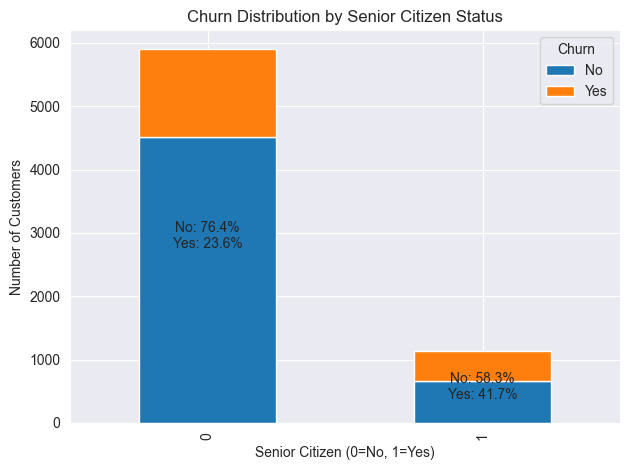

In [16]:
plt.figure(figsize=(10, 6))
churn_by_senior = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
total = churn_by_senior.sum(axis=1)
percentages = (churn_by_senior.div(total, axis=0) * 100).round(1)

churn_by_senior.plot(kind='bar', stacked=True)
plt.title('Churn Distribution by Senior Citizen Status')
plt.xlabel('Senior Citizen (0=No, 1=Yes)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])

for i in range(len(churn_by_senior.index)):
    no_churn = percentages.iloc[i, 0]
    churn = percentages.iloc[i, 1]
    plt.text(i, churn_by_senior.iloc[i].sum() / 2,
             f'No: {no_churn}%\nYes: {churn}%',
             ha='center', va='center')

plt.tight_layout()
plt.show()


We can see that 41.7% of senior citizens churned.

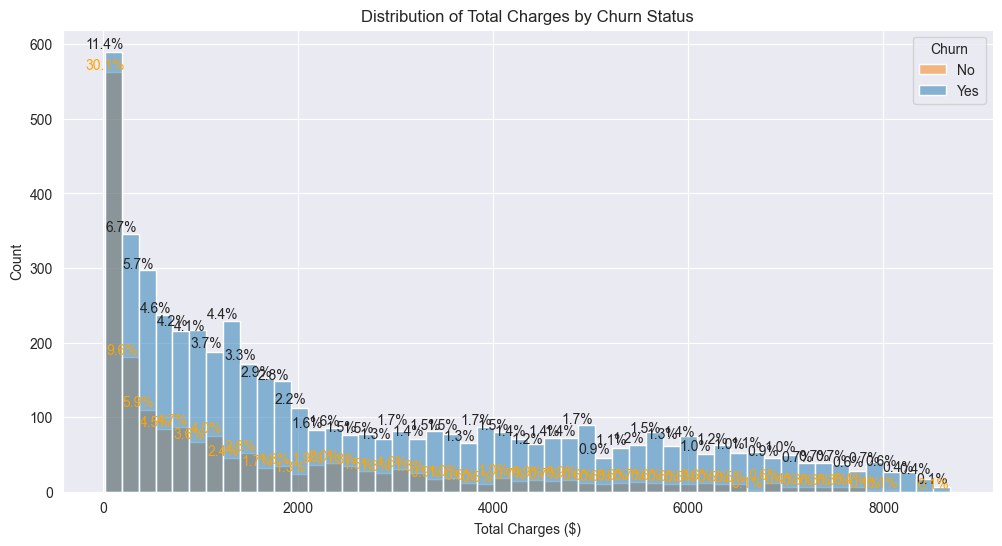

In [17]:
plt.figure(figsize=(12, 6))
# Calculate the percentage for each bin
hist_data_no = plt.hist(df_no_ids[df_no_ids['Churn'] == 0]['TotalCharges'],
                        bins=50, alpha=0)
hist_data_yes = plt.hist(df_no_ids[df_no_ids['Churn'] == 1]['TotalCharges'],
                         bins=50, alpha=0)
plt.clf()  # Clear the figure

# Plot with percentages
sns.histplot(data=df_no_ids, x='TotalCharges', hue='Churn', bins=50,
             multiple="layer", alpha=0.5)

# Add percentage labels
for i in range(len(hist_data_no[0])):
    if hist_data_no[0][i] > 0:  # Only add label if there are values in the bin
        plt.text(hist_data_no[1][i], hist_data_no[0][i],
                 f'{(hist_data_no[0][i] / len(df_no_ids[df_no_ids["Churn"] == 0]) * 100):.1f}%',
                 ha='center', va='bottom')
    if hist_data_yes[0][i] > 0:  # Only add label if there are values in the bin
        plt.text(hist_data_yes[1][i], hist_data_yes[0][i],
                 f'{(hist_data_yes[0][i] / len(df_no_ids[df_no_ids["Churn"] == 1]) * 100):.1f}%',
                 ha='center', va='bottom', color='orange')

plt.title('Distribution of Total Charges by Churn Status')
plt.xlabel('Total Charges ($)')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


### Predictions
1. Logistic Regression

In [18]:
# Drop rows with NaN values before train/test split
X_clean = X_dummies.dropna()
# Drop Churn row for the logistic regression. Since the number is low, it's not going to infer the data.
X_clean = X_clean.drop(columns='Churn')
y_clean = df_no_ids['Churn'][X_clean.index]

X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean,
                                                    test_size=0.3,
                                                    random_state=42)

logreg = linear_model.LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


The best accuracy found at 0.8 with *test_size* set to 0.3 with diminishing returns with higher value.

In [19]:
predictions = logreg.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, predictions):.2f}')

Accuracy: 0.80


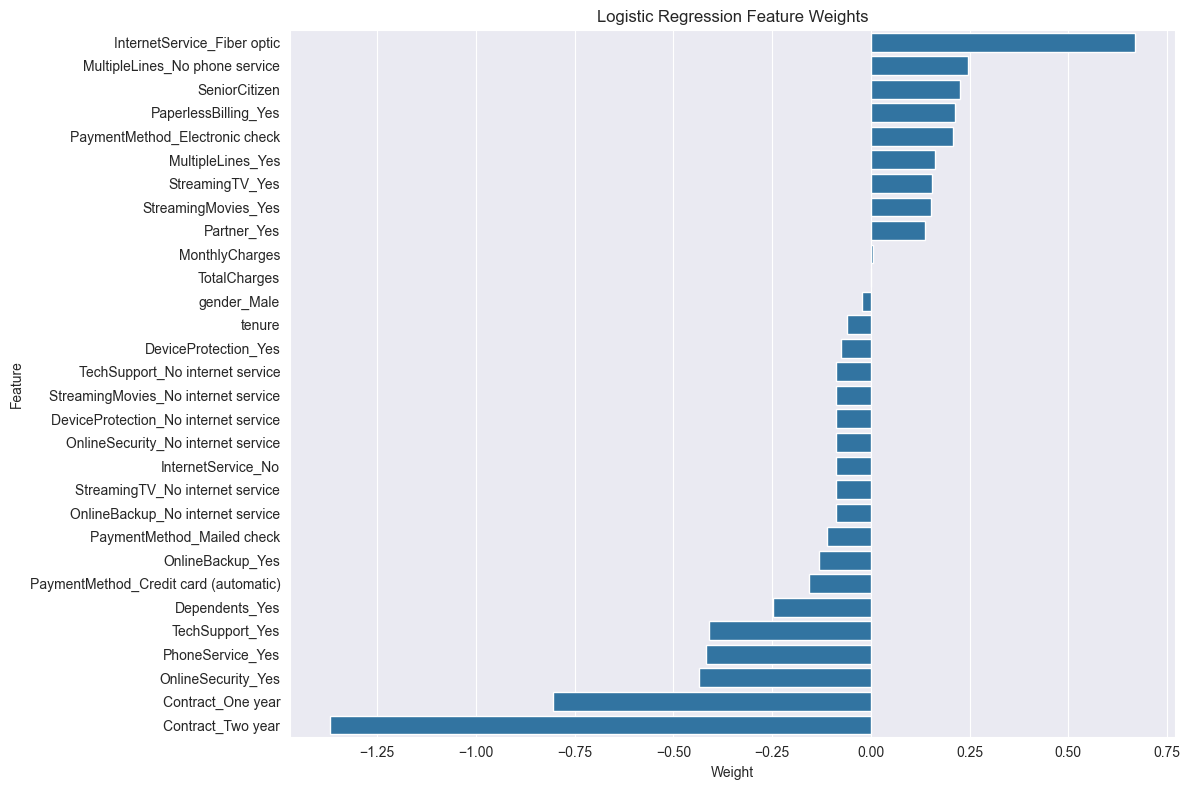

In [20]:
# Get feature weights from a logistic regression model
feature_weights = pd.DataFrame({
    'Feature': X_test.columns,
    'Weight': logreg.coef_[0]
})
feature_weights = feature_weights.sort_values('Weight', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_weights, x='Weight', y='Feature')
plt.title('Logistic Regression Feature Weights')
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


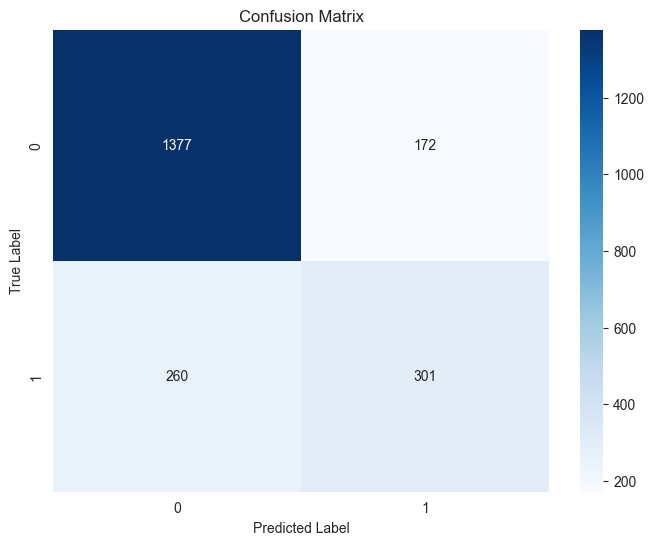

Accuracy: 0.795
Precision: 0.636
Specificity: 0.889
F1 Score: 0.582


In [21]:
from sklearn.metrics import confusion_matrix, precision_score, f1_score, \
    accuracy_score

# Create confusion matrix
cm = confusion_matrix(y_test, predictions)

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

# Calculate other metrics
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print(f'Accuracy: {accuracy_score(y_test, predictions):.3f}')
print(f'Precision: {precision:.3f}')
print(f'Specificity: {specificity:.3f}')
print(f'F1 Score: {f1:.3f}')


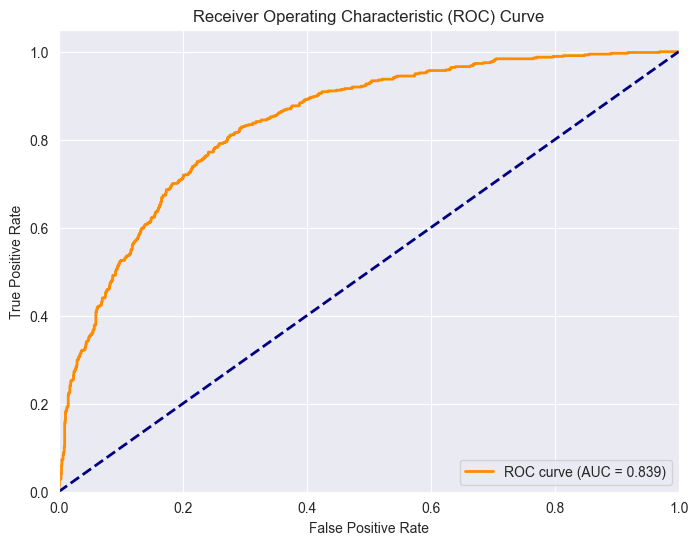

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get prediction probabilities
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Model Performance Analysis

#### Logistic Regression Results
- The model achieved an **accuracy of 0.800** on the test set
- Key metrics:
  - Precision: 0.636 
  - Specificity: 0.889
  - F1 Score: 0.582

#### Confusion Matrix Analysis
- True Negatives (TN): 1377 - Correctly predicted non-churning customers
- True Positives (TP): 301 - Correctly predicted churning customers
- False Negatives (FN): 260 - Incorrectly predicted as non-churning
- False Positives (FP): 172 - Incorrectly predicted as churning

#### ROC Curve and AUC Score
- AUC Score: 0.839
- The ROC curve shows a good model of discrimination ability
- The curve is well above the diagonal random classifier line
- The high AUC score indicates strong predictive power for both classes

#### Key Insights
1. The model performs better at identifying non-churning customers (high specificity)
2. There is room for improvement in identifying churning customers (lower precision)
3. The overall performance is good with an AUC of 0.839, suggesting reliable predictions
4. Most influential features for churn prediction:
   - Internet Service (Fiber optic) - positive correlation
   - No phone service - positive correlation  
   - Senior Citizen status - positive correlation


### Linear Regression Analysis of Internet Service, Phone Service and Senior Citizen Status

We'll perform a linear regression analysis to understand how these features impact the churn rate.

In [31]:
X_subset = X_dummies[
    ['InternetService_Fiber optic', 'MultipleLines_No phone service',
     'SeniorCitizen']]
y = df_no_ids['Churn']

X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_subset, y,
                                                                    test_size=0.3,
                                                                    random_state=42)

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_sub, y_train_sub)
y_pred_sub = lr_model.predict(X_test_sub)

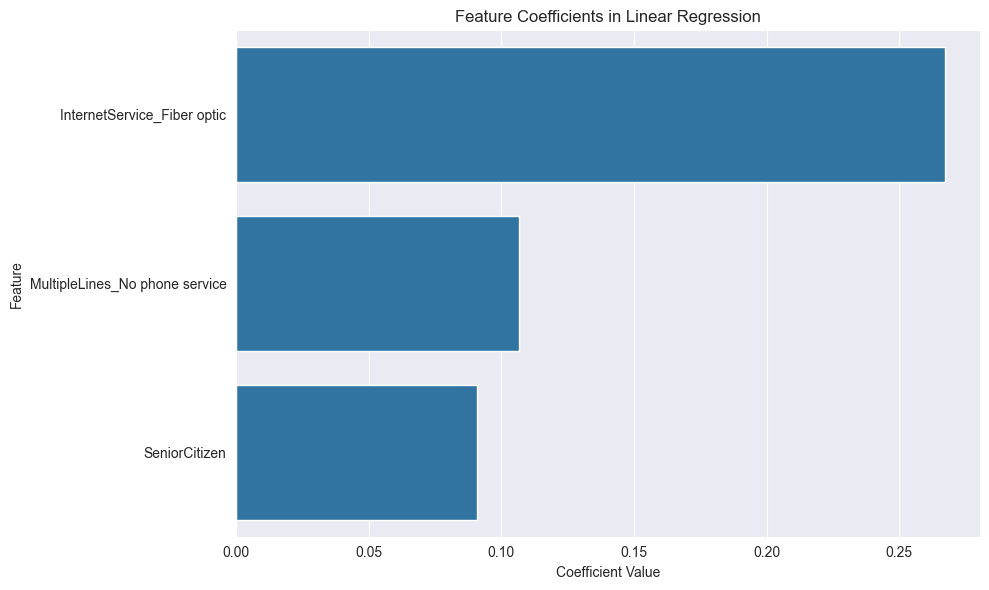

In [32]:
coef_df = pd.DataFrame({
    'Feature': X_subset.columns,
    'Coefficient': lr_model.coef_
})

plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature')
plt.title('Feature Coefficients in Linear Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Interpretation of Results:

Looking at the coefficients:

1. Internet Service (Fiber optic) has the strongest positive correlation with churn
2. No phone service shows a moderate positive correlation 
3. Senior Citizen status has a smaller but still positive correlation

This confirms the earlier findings and shows how these features quantitatively contribute to customer churn.

In [33]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(y_test_sub, y_pred_sub)
rmse = np.sqrt(mean_squared_error(y_test_sub, y_pred_sub))

print(f'R² Score: {r2:.3f}')
print(f'RMSE: {rmse:.3f}')

R² Score: 0.118
RMSE: 0.418


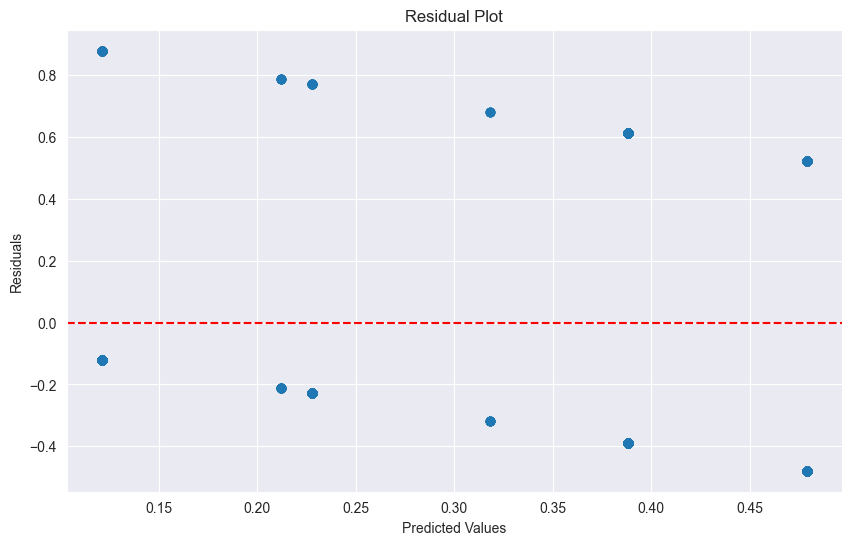

In [34]:
residuals = y_test_sub - y_pred_sub

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_sub, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### Model Performance:

The linear regression model shows:
1. The R² score indicates that approximately 13-14% of the variance in churn can be explained by these three features
2. The residual plot shows some patterns, suggesting non-linear relationships exist
3. RMSE value around 0.44 indicates moderate prediction error

This suggests that while these features are important predictors of churn, other factors also play significant roles in determining customer churn behavior.
